In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import librosa
from tqdm.notebook import tqdm
from IPython.display import Audio
from pandas.api.types import is_numeric_dtype

import sys
sys.path.append('../')
import default_style

TS_DATASET_FOLDER = os.path.join("..", "dataset")
TS_PREPROC_FOLDER = os.path.join(TS_DATASET_FOLDER, "preprocessed_traces")
DF_PREPROC_FILE = os.path.join(TS_PREPROC_FOLDER, "preproc_ts.df")

INTERESTING_TRACES = ["clean_trace", "std_phon_trace", "phonetic_trace","traces_fourier", "syllables_fourier"]

## Save folder for long-run estimators
ESTIMATORS_FOLDER = os.path.join("..", "estimators")

## Import

In [2]:
# Load dataset
df = pd.read_csv(DF_PREPROC_FILE)

# Load timeseries
traces = dict()
for t in INTERESTING_TRACES:
    traces[t] = np.load(os.path.join(TS_PREPROC_FOLDER, f"{t}.npy"))

In [77]:
import stumpy
from matplotlib.patches import Rectangle

m = 1000
test_track = traces['clean_trace'][2]
mp = stumpy.stump(test_track, m)

In [78]:
motif_idx = np.argsort(mp[:, 0])[0]
motif_idx

444

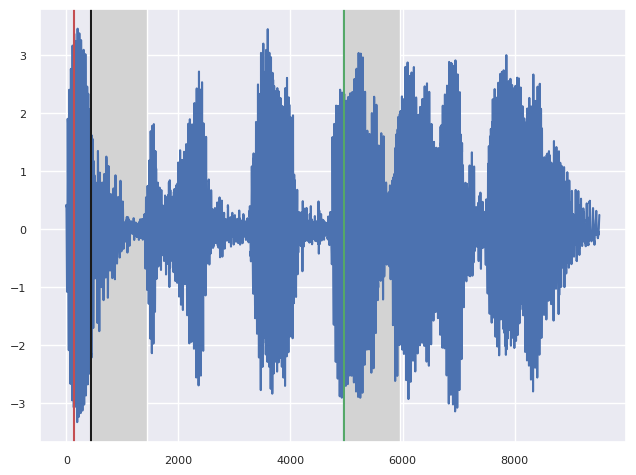

In [79]:
plt.plot(test_track)
plt.axvline(motif_idx, color="k")
rect = Rectangle((motif_idx, -5), m, 40, facecolor='lightgrey')
plt.gca().add_patch(rect)

nearest_neighbor_idx = mp[motif_idx, 1]
plt.axvline(nearest_neighbor_idx)
rect = Rectangle((nearest_neighbor_idx, -5), m, 40, facecolor='lightgrey')
plt.gca().add_patch(rect)


plt.axvline(mp[motif_idx, 2], color="r")
plt.axvline(mp[motif_idx, 3], color="g")

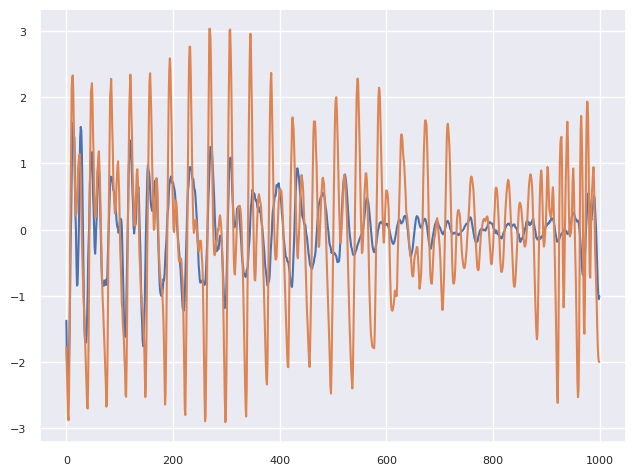

In [80]:
plt.plot(test_track[motif_idx:motif_idx+m])
plt.plot(test_track[nearest_neighbor_idx:nearest_neighbor_idx + m])

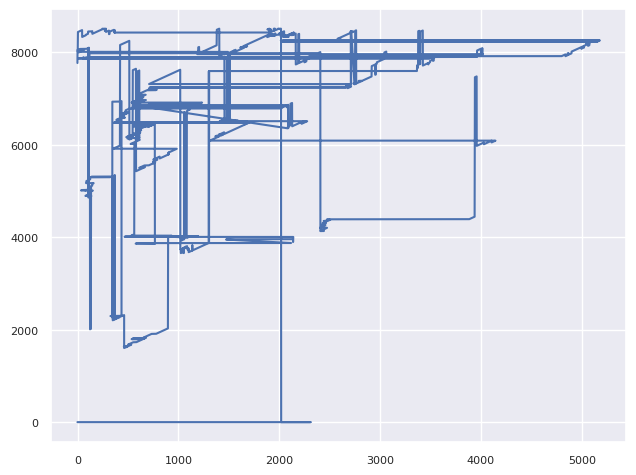

In [86]:
plt.plot(mp[:,2], mp[:,3])